## Adquisición y preprocesamiento de la información

<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>



### Práctica 8 -Solución

No olvidar los dos nombres:

Nombre 1:

Nombre 2:


###  Carga de datos
Vamos a usar datos sobre la longevidad de diferentes animales publicados en la prestigiosa revista [nature](https://www.nature.com/articles/sdata201919)

In [1]:
import pandas as pd
df = pd.read_csv("https://figshare.com/ndownloader/files/14016683",sep=",",encoding="latin1")
df

Species Common Name          Scientific Name TaxonClass  \
0                         Addax      Addax nasomaculatus   Mammalia   
1             Agouti, Brazilian      Dasyprocta leporina   Mammalia   
2            Alligator, Chinese       Alligator sinensis   Reptilia   
3                 Anoa, Lowland   Bubalus depressicornis   Mammalia   
4               Anteater, Giant  Myrmecophaga tridactyla   Mammalia   
..                          ...                      ...        ...   
325           Woodhoopoe, Green    Phoeniculus purpureus       Aves   
326     Wood-partridge, Crested         Rollulus rouloul       Aves   
327              Zebra, Grevy's             Equus grevyi   Mammalia   
328  Zebra, Hartmann's Mountain   Equus zebra hartmannae   Mammalia   
329               Zebra, Plains            Equus quagga    Mammalia   

     Overall Sample Size   Overall MLE  Overall CI - lower  \
0                  1215.0         13.4                12.4   
1                   456.0          8.1                 7.2   
2                   351.0         30.9                25.9   
3                   256.0         17.7                15.3   
4                   177.0         19.7                17.1   
..                    ...          ...                 ...   
325                 284.0          5.4                 4.5   
326                1319.0          4.8                 4.6   
327                 797.0         14.1                12.9   
328                 585.0         13.9                12.3   
329                1635.0         15.6                14.4   

     Overall CI - upper  Male Sample Size  Male MLE  Male CI - lower  \
0                  14.5             558.0      12.3             10.5   
1                   9.3             216.0       8.8              6.9   
2                  34.3             151.0      25.9             23.9   
3                  21.2             113.0      16.3             14.7   
4                  21.5              86.0      19.4             17.1   
..                  ...               ...       ...              ...   
325                 6.3             136.0       6.0              4.7   
326                 5.1             645.0       5.0              4.6   
327                15.3             341.0      11.2              8.8   
328                15.3             283.0      12.3             10.8   
329                16.5             638.0      14.0             11.6   

     Male CI - upper  Female Sample Size   Female MLE  Female CI - lower  \
0               14.7                656.0        14.4               13.0   
1               10.3                220.0         7.8                6.8   
2               52.1                176.0        32.8               25.9   
3               21.3                139.0        18.8               15.2   
4               21.5                 90.0        19.7               16.2   
..               ...                  ...         ...                ...   
325              7.0                130.0         4.3                3.2   
326              5.3                633.0         4.7                4.3   
327             13.2                455.0        16.5               14.4   
328             13.9                301.0        15.4               13.2   
329             15.9                991.0        16.0               14.9   

    Female CI - upper Male Data Deficient Female Data Deficient  
0                15.1                 NaN                   NaN  
1                 8.6                 NaN                   NaN  
2                  46                 yes                   yes  
3                21.5                 yes                   yes  
4                  22                 yes                   yes  
..                ...                 ...                   ...  
325                 6                 NaN                   NaN  
326                 5                 NaN                   NaN  
327                18                 NaN 

In [77]:
df.columns

Index(['Species Common Name', 'Scientific Name', 'TaxonClass',
       'Overall Sample Size ', 'Overall MLE', 'Overall CI - lower',
       'Overall CI - upper', 'Male Sample Size', 'Male MLE', 'Male CI - lower',
       'Male CI - upper', 'Female Sample Size ', 'Female MLE',
       'Female CI - lower', 'Female CI - upper', 'Male Data Deficient',
       'Female Data Deficient'],
      dtype='object')

Metadatos:

* `Species Common Name`: nombre común de la especie
* `Scientific Name`: nombre científico de la especie
* `TaxonClass`: clase taxonómica
<br>

* `Overall Sample Size`: número de animales de esa especie que se han considerado en el experimento
* `Overall MLE`: median life expectancy, es decir longevidad media de los animales de esa especie considerados
* `Overall CI - lower`: valor inferior del intervalo de confianza al 95% para la vida media
* `Overall CI - upper`: valor superior del intervalo de confianza al 95% para la vida media
<br>

* `Male Sample Size`, `Male MLE`, `Male CI - lower`, `Male CI - upper`: los 4 valores anteriores pero restringidos a machos
* `Female Sample Size`, `Female MLE`,  `Female CI - lower`, `Female CI - upper`: los 4 valores anteriores pero restringidos a hembras
<br>

* `Male Data Deficient`, `Female Data Deficient`: indicadores de posibles filas erróneas

**Ejercicio 1** 

a) Las dos últimas columnas parecen indicar cúando los valores registrados pueden ser erróneos (Deficient) ya sea para machos o para hembras. Eliminar de `df` todas las filas que parezcan indicar que hay valores deficientes ya sea para machos o para hembras. Dejar el resultado en `df2`.


In [2]:
# solución
filtro = (df["Male Data Deficient"].str.strip()=="yes") | (df["Female Data Deficient"].str.strip()=="yes")
df2 = df[~filtro]

df2

Species Common Name         Scientific Name TaxonClass  \
0                         Addax     Addax nasomaculatus   Mammalia   
1             Agouti, Brazilian     Dasyprocta leporina   Mammalia   
6               Antelope, Sable       Hippotragus niger   Mammalia   
7                Aracari, Green    Pteroglossus viridis       Aves   
8                  Argus, Great       Argusianus argusÊ       Aves   
..                          ...                     ...        ...   
325           Woodhoopoe, Green   Phoeniculus purpureus       Aves   
326     Wood-partridge, Crested        Rollulus rouloul       Aves   
327              Zebra, Grevy's            Equus grevyi   Mammalia   
328  Zebra, Hartmann's Mountain  Equus zebra hartmannae   Mammalia   
329               Zebra, Plains           Equus quagga    Mammalia   

     Overall Sample Size   Overall MLE  Overall CI - lower  \
0                  1215.0         13.4                12.4   
1                   456.0          8.1                 7.2   
6                  1398.0         11.3                10.5   
7                   358.0          7.9                 6.3   
8                   310.0         10.8                 9.4   
..                    ...          ...                 ...   
325                 284.0          5.4                 4.5   
326                1319.0          4.8                 4.6   
327                 797.0         14.1                12.9   
328                 585.0         13.9                12.3   
329                1635.0         15.6                14.4   

     Overall CI - upper  Male Sample Size  Male MLE  Male CI - lower  \
0                  14.5             558.0      12.3             10.5   
1                   9.3             216.0       8.8              6.9   
6                  11.9             602.0      10.6              9.8   
7                   9.3             174.0       8.5              6.1   
8                  12.5             138.0      10.6              8.3   
..                  ...               ...       ...              ...   
325                 6.3             136.0       6.0              4.7   
326                 5.1             645.0       5.0              4.6   
327                15.3             341.0      11.2              8.8   
328                15.3             283.0      12.3             10.8   
329                16.5             638.0      14.0             11.6   

     Male CI - upper  Female Sample Size   Female MLE  Female CI - lower  \
0               14.7                656.0        14.4               13.0   
1               10.3                220.0         7.8                6.8   
6               12.0                795.0        11.6               10.5   
7               10.9                175.0         7.6                6.2   
8               12.9                160.0        11.1                9.3   
..               ...                  ...         ...                ...   
325              7.0                130.0         4.3                3.2   
326              5.3                633.0         4.7                4.3   
327             13.2                455.0        16.5               14.4   
328             13.9                301.0        15.4               13.2   
329             15.9                991.0        16.0               14.9   

    Female CI - upper Male Data Deficient Female Data Deficient  
0                15.1                 NaN                   NaN  
1                 8.6                 NaN                   NaN  
6                12.2                 NaN                   NaN  
7                 8.9                 NaN                   NaN  
8                14.1                 NaN                   NaN  
..                ...                 ...                   ...  
325                 6                 NaN                   NaN  
326                 5                 NaN                   NaN  
327                18                 NaN             

b) Eliminar las 2 últimas columnas de `df2`, ya han cumplido su objetivo y no las vamos a utilizar, dejando el nombre en `df_animales`


In [3]:
# solución
df_animales = df2.drop(columns=df.columns[-2:])

# para probar
df_animales

Species Common Name         Scientific Name TaxonClass  \
0                         Addax     Addax nasomaculatus   Mammalia   
1             Agouti, Brazilian     Dasyprocta leporina   Mammalia   
6               Antelope, Sable       Hippotragus niger   Mammalia   
7                Aracari, Green    Pteroglossus viridis       Aves   
8                  Argus, Great       Argusianus argusÊ       Aves   
..                          ...                     ...        ...   
325           Woodhoopoe, Green   Phoeniculus purpureus       Aves   
326     Wood-partridge, Crested        Rollulus rouloul       Aves   
327              Zebra, Grevy's            Equus grevyi   Mammalia   
328  Zebra, Hartmann's Mountain  Equus zebra hartmannae   Mammalia   
329               Zebra, Plains           Equus quagga    Mammalia   

     Overall Sample Size   Overall MLE  Overall CI - lower  \
0                  1215.0         13.4                12.4   
1                   456.0          8.1                 7.2   
6                  1398.0         11.3                10.5   
7                   358.0          7.9                 6.3   
8                   310.0         10.8                 9.4   
..                    ...          ...                 ...   
325                 284.0          5.4                 4.5   
326                1319.0          4.8                 4.6   
327                 797.0         14.1                12.9   
328                 585.0         13.9                12.3   
329                1635.0         15.6                14.4   

     Overall CI - upper  Male Sample Size  Male MLE  Male CI - lower  \
0                  14.5             558.0      12.3             10.5   
1                   9.3             216.0       8.8              6.9   
6                  11.9             602.0      10.6              9.8   
7                   9.3             174.0       8.5              6.1   
8                  12.5             138.0      10.6              8.3   
..                  ...               ...       ...              ...   
325                 6.3             136.0       6.0              4.7   
326                 5.1             645.0       5.0              4.6   
327                15.3             341.0      11.2              8.8   
328                15.3             283.0      12.3             10.8   
329                16.5             638.0      14.0             11.6   

     Male CI - upper  Female Sample Size   Female MLE  Female CI - lower  \
0               14.7                656.0        14.4               13.0   
1               10.3                220.0         7.8                6.8   
6               12.0                795.0        11.6               10.5   
7               10.9                175.0         7.6                6.2   
8               12.9                160.0        11.1                9.3   
..               ...                  ...         ...                ...   
325              7.0                130.0         4.3                3.2   
326              5.3                633.0         4.7                4.3   
327             13.2                455.0        16.5               14.4   
328             13.9                301.0        15.4               13.2   
329             15.9                991.0        16.0               14.9   

    Female CI - upper  
0                15.1  
1                 8.6  
6                12.2  
7                 8.9  
8                14.1  
..                ...  
325                 6  
326                 5  
327                18  
328                17  
329                17  

[246 rows x 15 columns]

**Ejercicio 2** Examinamos los tipos antes de hacer nada:

In [4]:
df_animales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 329
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species Common Name   246 non-null    object 
 1   Scientific Name       246 non-null    object 
 2   TaxonClass            246 non-null    object 
 3   Overall Sample Size   246 non-null    float64
 4   Overall MLE           246 non-null    float64
 5   Overall CI - lower    246 non-null    float64
 6   Overall CI - upper    246 non-null    float64
 7   Male Sample Size      246 non-null    float64
 8   Male MLE              246 non-null    float64
 9   Male CI - lower       246 non-null    float64
 10  Male CI - upper       246 non-null    float64
 11  Female Sample Size    246 non-null    float64
 12  Female MLE            246 non-null    float64
 13  Female CI - lower     246 non-null    float64
 14  Female CI - upper     246 non-null    object 
dtypes: float64(11), object(

Parece que el tipo del último valor no es correcto, debería ser `float`. Escribir el código necesario para que la columna `Female CI - upper` pase a ser de tipo `float`. Dejar el resultado en el propio `df_animales`

In [5]:
# solución
df_animales["Female CI - upper"] = df_animales["Female CI - upper"].astype("float")

# para probar
df_animales.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 329
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species Common Name   246 non-null    object 
 1   Scientific Name       246 non-null    object 
 2   TaxonClass            246 non-null    object 
 3   Overall Sample Size   246 non-null    float64
 4   Overall MLE           246 non-null    float64
 5   Overall CI - lower    246 non-null    float64
 6   Overall CI - upper    246 non-null    float64
 7   Male Sample Size      246 non-null    float64
 8   Male MLE              246 non-null    float64
 9   Male CI - lower       246 non-null    float64
 10  Male CI - upper       246 non-null    float64
 11  Female Sample Size    246 non-null    float64
 12  Female MLE            246 non-null    float64
 13  Female CI - lower     246 non-null    float64
 14  Female CI - upper     246 non-null    float64
dtypes: float64(12), object(

**Ejercicio 3**  a) Crear un dataframe `datos` con las mismas filas que `df_animales` pero solo con las columnas de tipo numérico

Ayuda: buscar información sobre el método `select_dtypes`

In [7]:
# solución
datos = df_animales.select_dtypes("number")

# para probar
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 329
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Overall Sample Size   246 non-null    float64
 1   Overall MLE           246 non-null    float64
 2   Overall CI - lower    246 non-null    float64
 3   Overall CI - upper    246 non-null    float64
 4   Male Sample Size      246 non-null    float64
 5   Male MLE              246 non-null    float64
 6   Male CI - lower       246 non-null    float64
 7   Male CI - upper       246 non-null    float64
 8   Female Sample Size    246 non-null    float64
 9   Female MLE            246 non-null    float64
 10  Female CI - lower     246 non-null    float64
 11  Female CI - upper     246 non-null    float64
dtypes: float64(12)
memory usage: 25.0 KB


b) Hacer el boxplot de "Male MLE" y el de "Female MLE" en `datos` (mejor si queda uno al lado del otro)

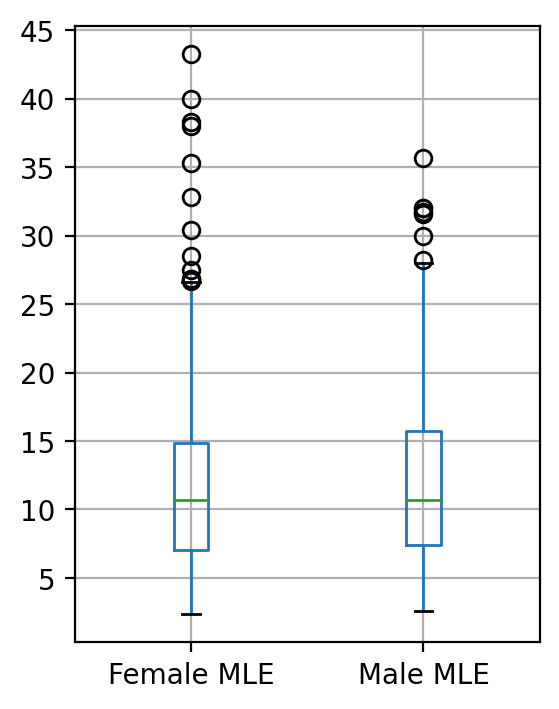

In [10]:
cols = ["Female MLE", "Male MLE"] # por si sirve de ayuya, pero no es imprescindible

# solución 
from matplotlib import pyplot as plt
plt.figure(figsize=(3,4),dpi=200)
datos[cols].boxplot()
plt.show()

¿sacas alguna consecuencia de estos gráficos? (una frase o dos deben bastar)

In [ ]:
Respuesta:

**Ejercicio 4** 

a) Obtener la tabla de correlaciones. Hacer que quede en un dataframe de nombre `corr`.

Nota: Normalmente habría que eliminar primero 'outliers sospechosos' pero como son datos de un artículo científico vamos a suponer que todos los outliers son valores correctos y no modificamos nada

In [90]:
# solución a)
corr = datos.corr()

# para ver el resultado
corr

Overall Sample Size   Overall MLE  Overall CI - lower  \
Overall Sample Size               1.000000     0.103199            0.150951   
Overall MLE                       0.103199     1.000000            0.993866   
Overall CI - lower                0.150951     0.993866            1.000000   
Overall CI - upper                0.068118     0.994840            0.981963   
Male Sample Size                  0.954360     0.098591            0.150367   
Male MLE                          0.084054     0.961793            0.952135   
Male CI - lower                   0.157284     0.948558            0.955366   
Male CI - upper                   0.035277     0.952369            0.931545   
Female Sample Size                0.938118     0.151707            0.201121   
Female MLE                        0.111092     0.986374            0.985083   
Female CI - lower                 0.178239     0.967088            0.979251   
Female CI - upper                 0.057821     0.980285            0.970003   

                      Overall CI - upper  Male Sample Size  Male MLE  \
Overall Sample Size             0.068118          0.954360  0.084054   
Overall MLE                     0.994840          0.098591  0.961793   
Overall CI - lower              0.981963          0.150367  0.952135   
Overall CI - upper              1.000000          0.060816  0.964761   
Male Sample Size                0.060816          1.000000  0.087360   
Male MLE                        0.964761          0.087360  1.000000   
Male CI - lower                 0.938514          0.169008  0.975532   
Male CI - upper                 0.965011          0.030637  0.985372   
Female Sample Size              0.113307          0.950957  0.099221   
Female MLE                      0.978005          0.105748  0.913062   
Female CI - lower               0.949874          0.175453  0.882200   
Female CI - upper               0.982942          0.050906  0.917409   

                      Male CI - lower  Male CI - upper  Female Sample Size   \
Overall Sample Size          0.157284         0.035277             0.938118   
Overall MLE                  0.948558         0.952369             0.151707   
Overall CI - lower           0.955366         0.931545             0.201121   
Overall CI - upper           0.938514         0.965011             0.113307   
Male Sample Size             0.169008         0.030637             0.950957   
Male MLE                     0.975532         0.985372             0.099221   
Male CI - lower              1.000000         0.940294             0.169346   
Male CI - upper              0.940294         1.000000             0.051425   
Female Sample Size           0.169346         0.051425             1.000000   
Female MLE                   0.909895         0.902899             0.174360   
Female CI - lower            0.894585         0.860638             0.251235   
Female CI - upper            0.899471         0.917960             0.114408   

                      Female MLE  Female CI - lower  Female CI - upper  
Overall Sample Size     0.111092           0.178239           0.057821  
Overall MLE             0.986374           0.967088           0.980285  
Overall CI - lower      0.985083           0.979251           0.970003  
Overall CI - upper      0.978005           0.949874           0.982942  
Male Sample Size        0.105748           0.175453           0.050906  
Male MLE                0.913062           0.882200           0.917409  
Male CI - lower         0.909895           0.894585           0.899471  
Male CI - upper         0.902899           0.860638           0.917960  
Female Sample Size      0.174360           0.251235           0.114408  
Female MLE              1.000000           0.984323           0.987923  
Female CI - lower       0.984323           1.000000           0.959989  
Female CI - upper       0.987923           0.959989           1.000000

b) Escribir código para mostrar las columnas con mayor correlación. No hace falta que muestre solo el nombre de las dos columnas, pero al menos reducir el dataframe `corr` para que se vea un dataframe pequeño que las contenga.

In [95]:
# solución 
sinunos = corr[corr!=1]
M = sinunos.max().max()

sinunos[sinunos==M].dropna(how="all").dropna(how="all",axis=1)


Overall MLE  Overall CI - upper
Overall MLE                 NaN             0.99484
Overall CI - upper      0.99484                 NaN

**Ejercicio 5** 

a) Vamos a mostrar gráficamente las correlaciones entre los valores en datos. En particular vamos a utilizar `sns.clustermap` para ver si podemos agrupar las variables en grupos. Basarse en las correlaciones que tenemos ya en el dataframe `corr`

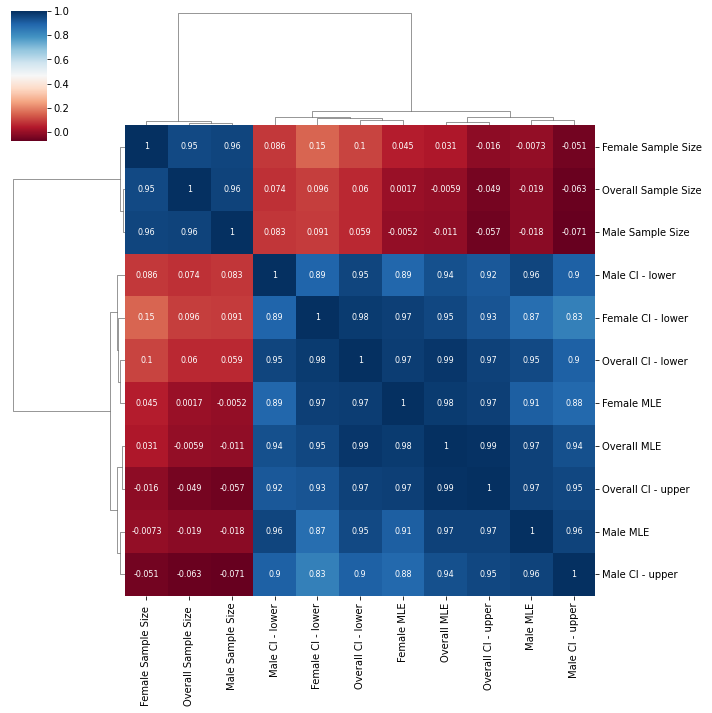

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# solución
g = sns.clustermap(corr, 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})

b) ¿Cuántos grupos ves y  qué columnas lo forman?

Respuesta:

**Ejercicio 6** Escribir código para separar `datos` en 2 dataframes: uno de nombre `df_size` que incluye todas las columnas de `datos` que incluyen la palabra "Size" y otro dataframe `df_mle` con el resto. 

Nota: intentar hacerlo sin escribir los nombres de las columnas directamente sino utilizando la propiedad de la inclusión o no de la palabra "Size" en el nombre de la columna

In [100]:
cols_size = [c for c in datos if "Size" in c]
df_size = datos[cols_size]
df_mle = datos[ list(set(datos.columns).difference(set(cols_size)))]

# para probar
print(df_size.columns.values)
print(df_mle.columns.values)

['Overall Sample Size ' 'Male Sample Size' 'Female Sample Size ']
['Female MLE' 'Male MLE' 'Overall CI - lower' 'Male CI - lower'
 'Female CI - lower' 'Male CI - upper' 'Overall CI - upper'
 'Female CI - upper' 'Overall MLE']


**Ejercicio 7** En `df_mle` (o  `datos` si no se ha hecho el ejercicio anterior) queremos mostrar las gráficas de cada pareja de columnas, es decir para cada pareja de columnas c1, c2 queremos hacer una gráfica de puntos que ponga c1 en las "x" y c2 en las "y". 

Notas:

* No se quiere utilizar `pairplot`ni funciones similares sino hacer nosotros cada gráfica con `scatter`de matplotlib
* Utilizar el método [title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) de plt para poner como título de cada gráfica los nombres de las columnas, algo como *Overall CI - upper versus
 Female CI - upper*
 
* No hacer la gráfica de una columna consigo misma ni repetir gráficas cambiando x por y, es decir si c1 es "x" y c2 es "y" no repetir con c2 como "x" y c1 como "y".

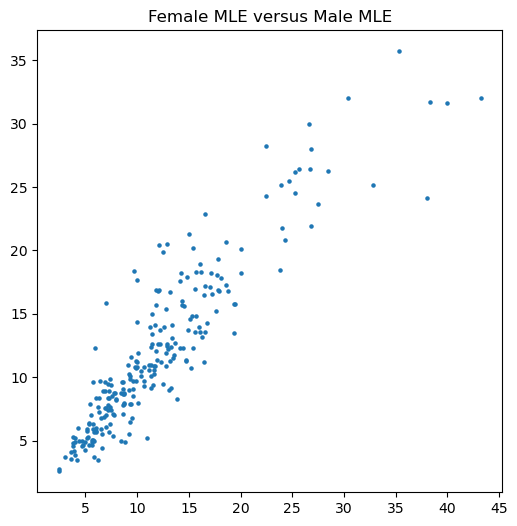

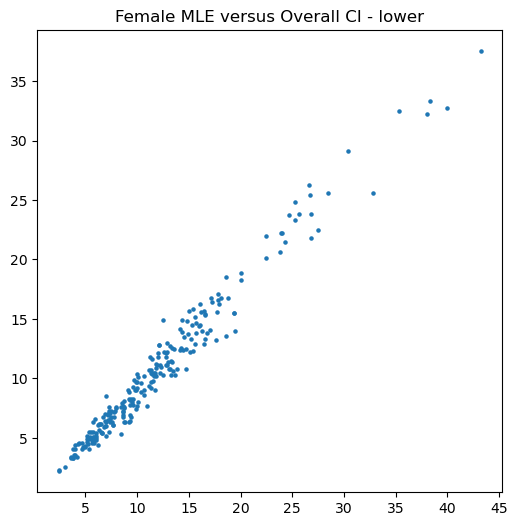

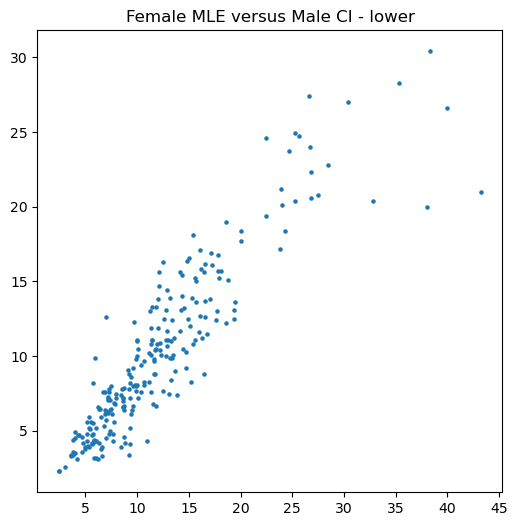

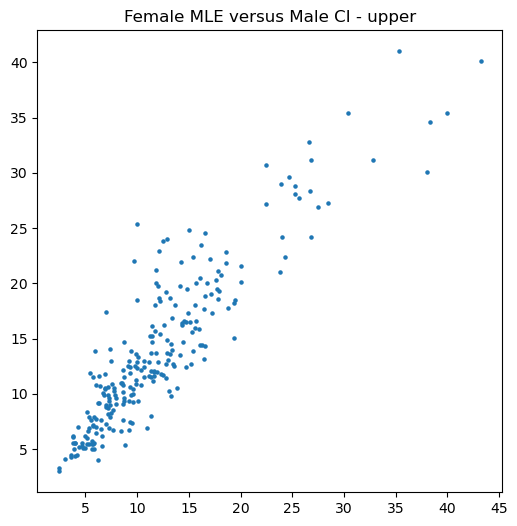

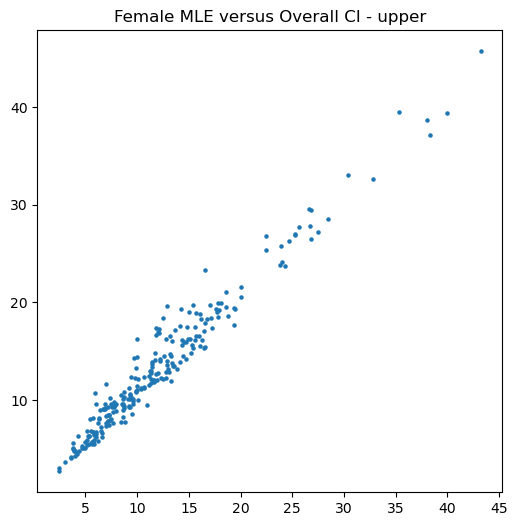

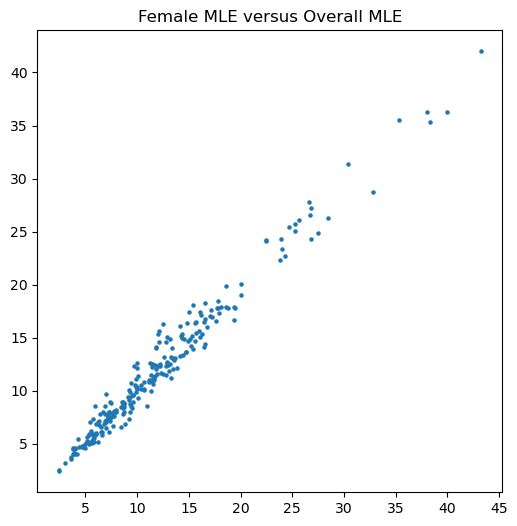

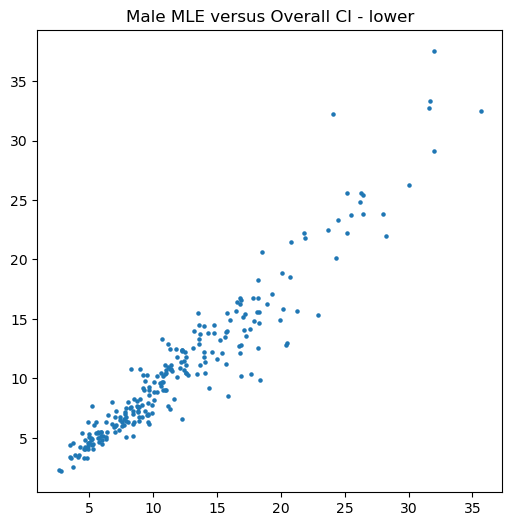

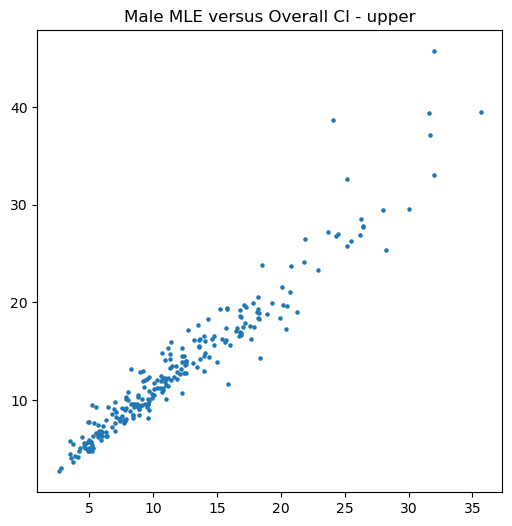

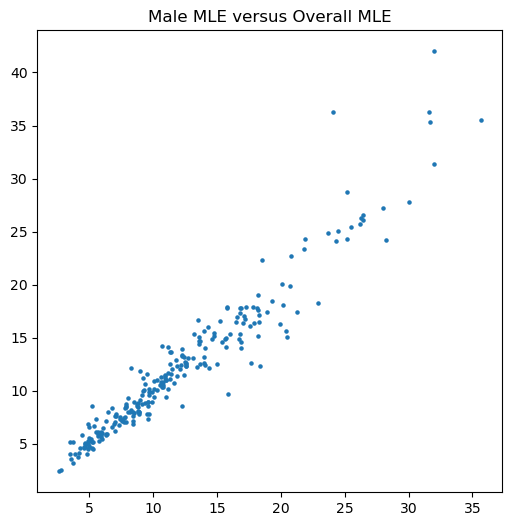

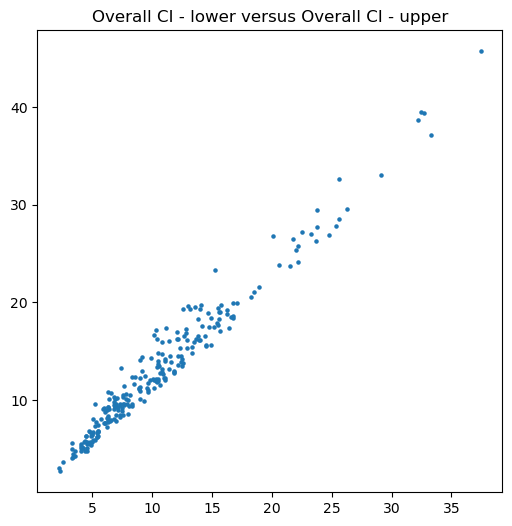

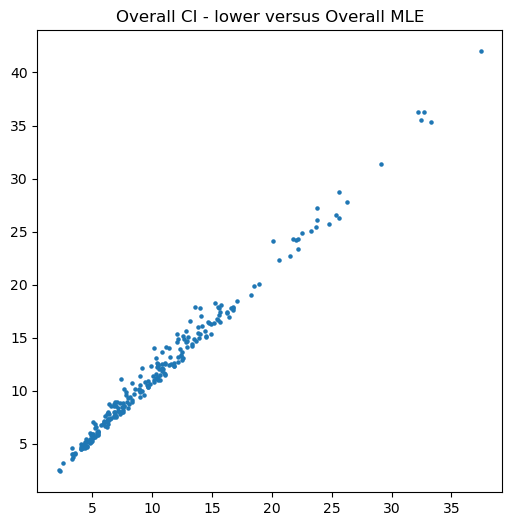

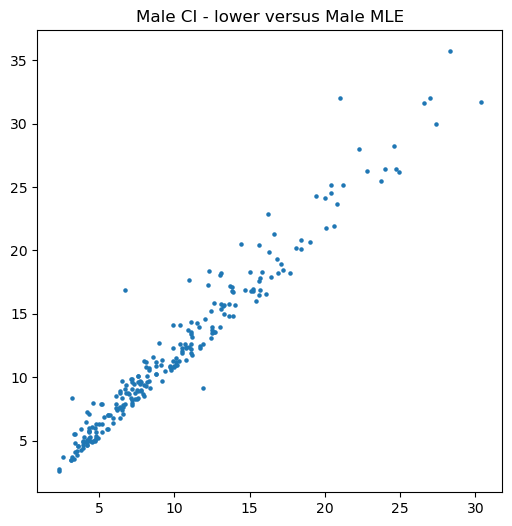

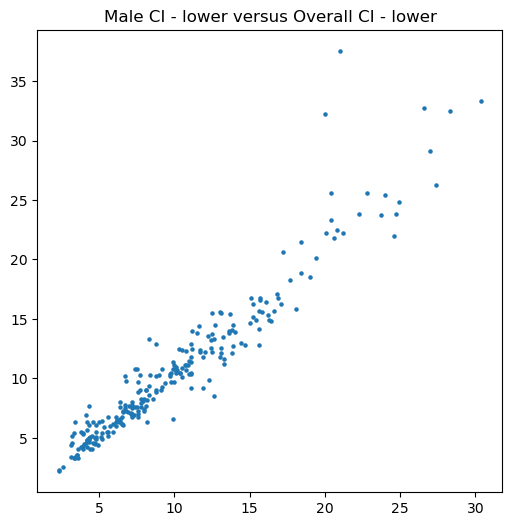

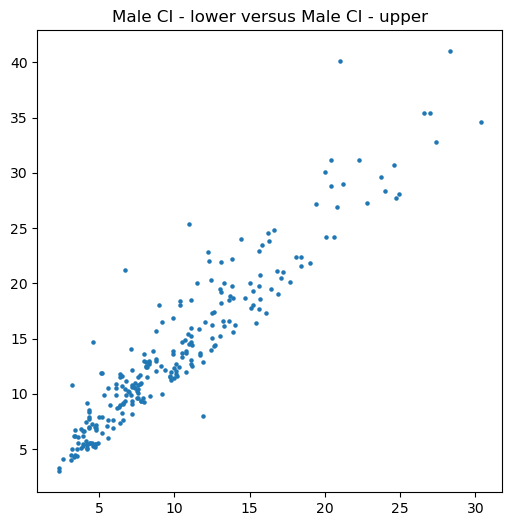

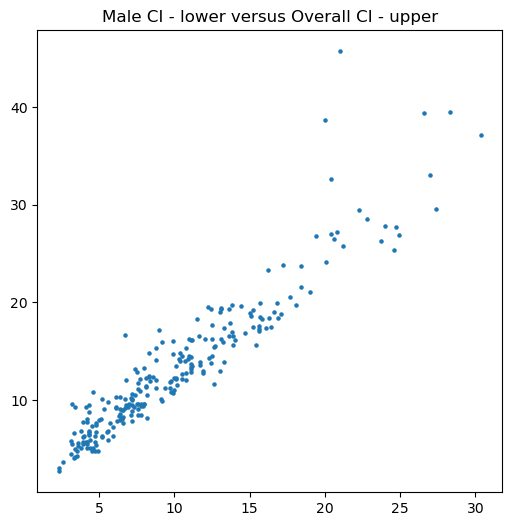

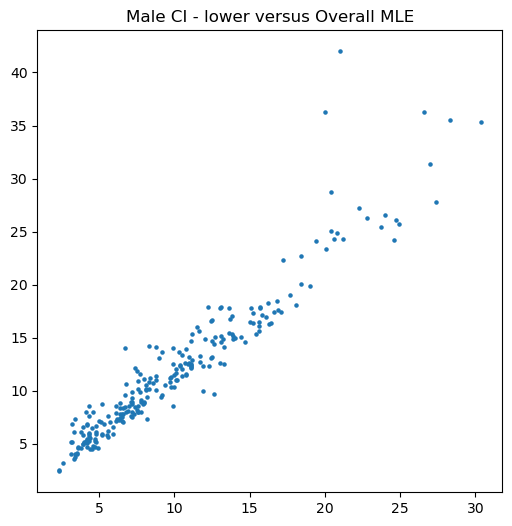

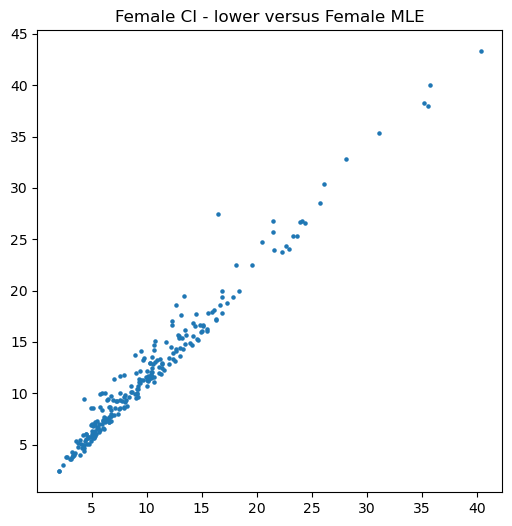

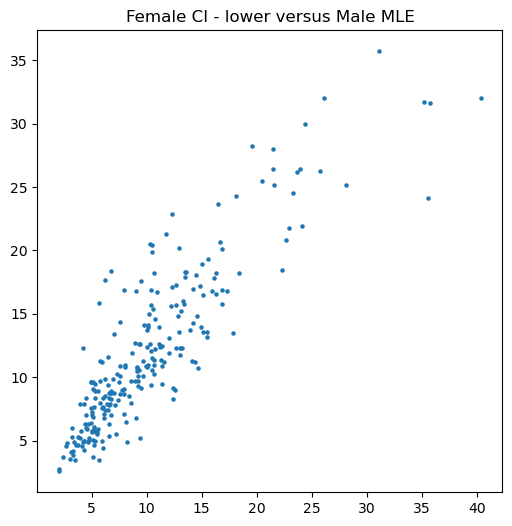

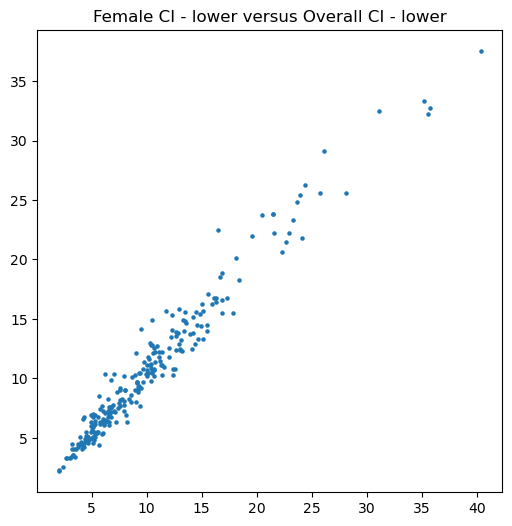

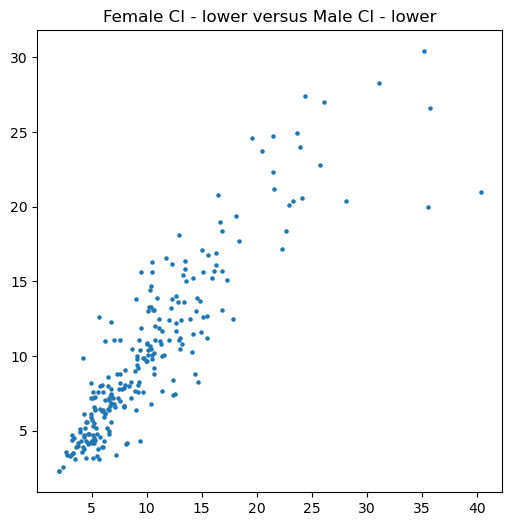

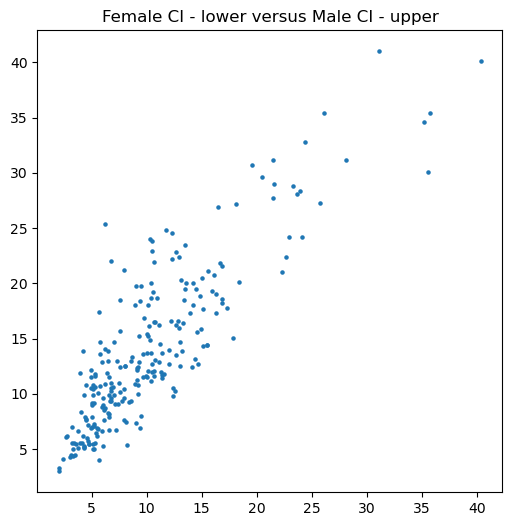

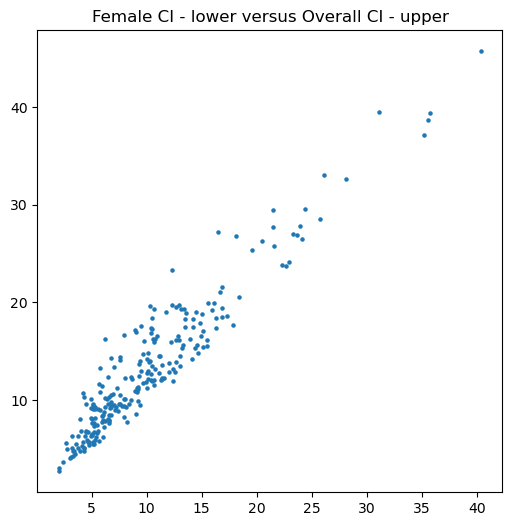

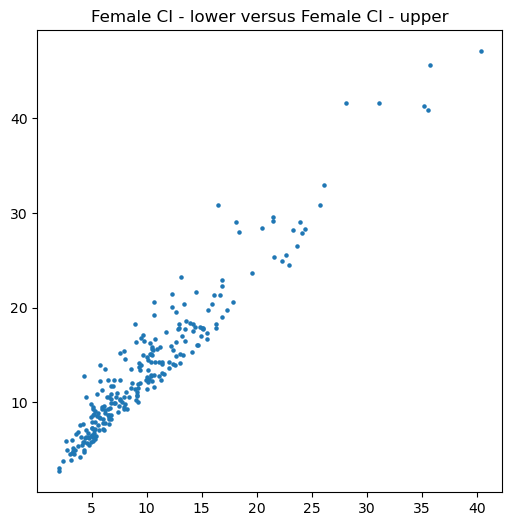

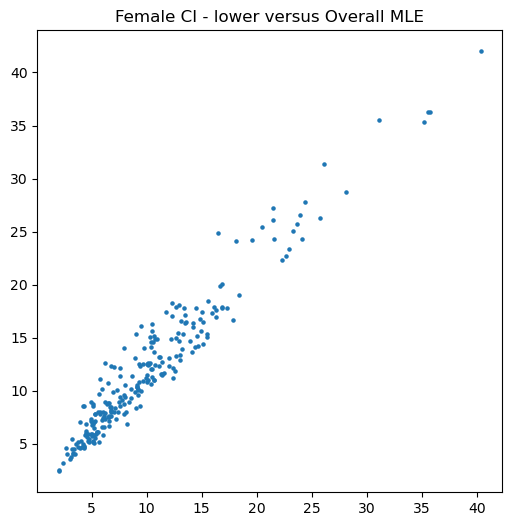

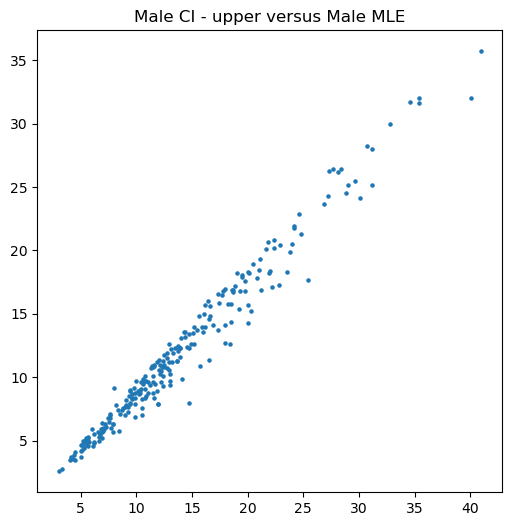

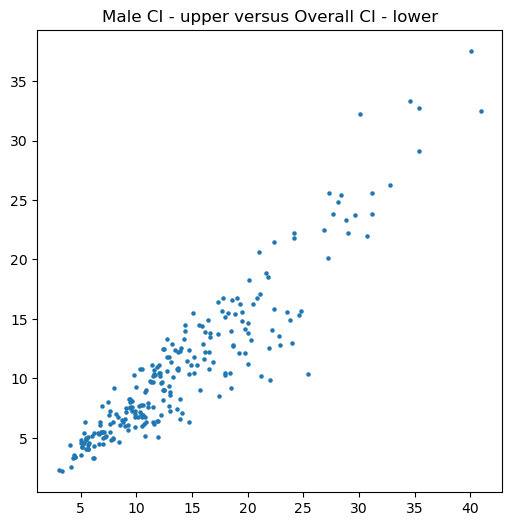

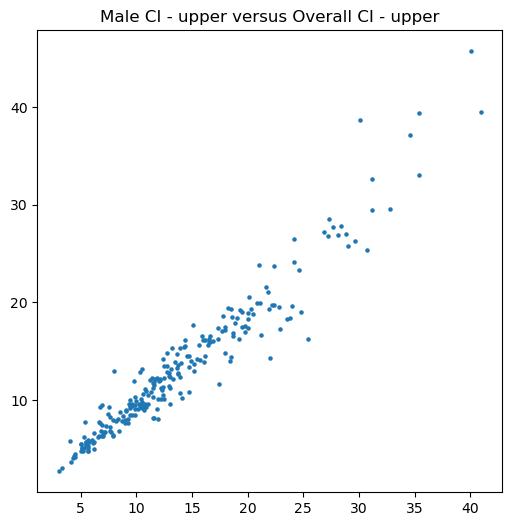

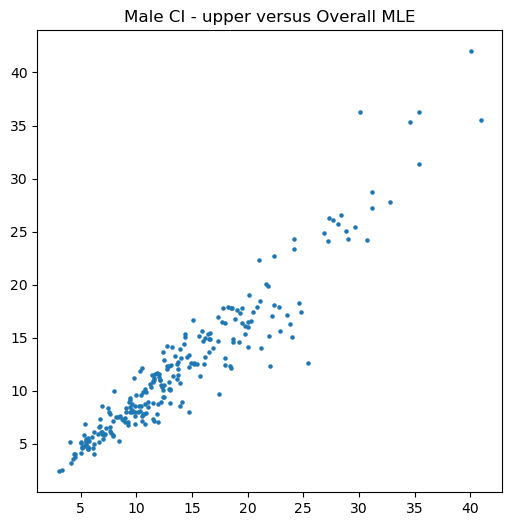

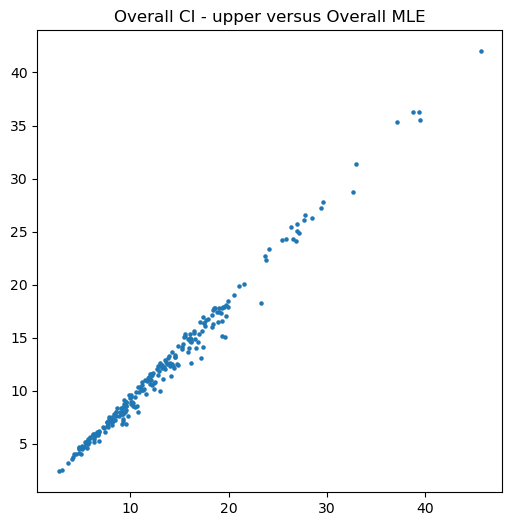

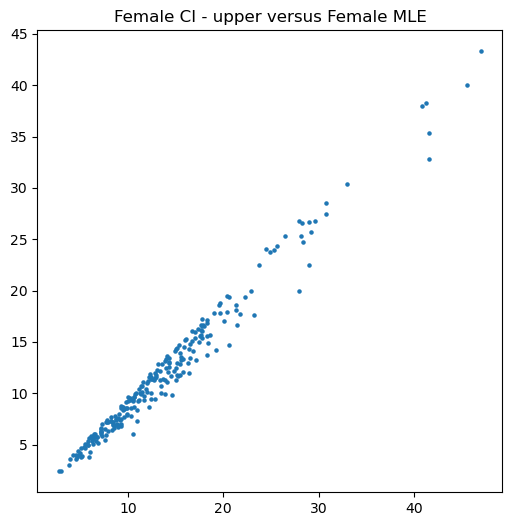

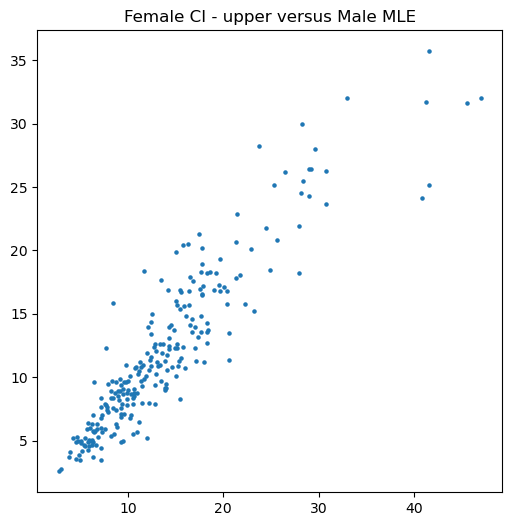

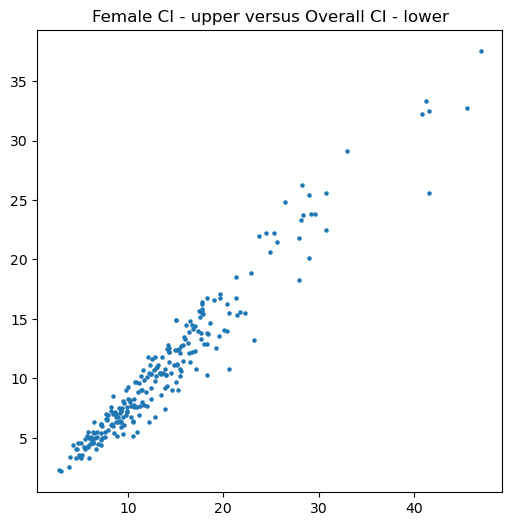

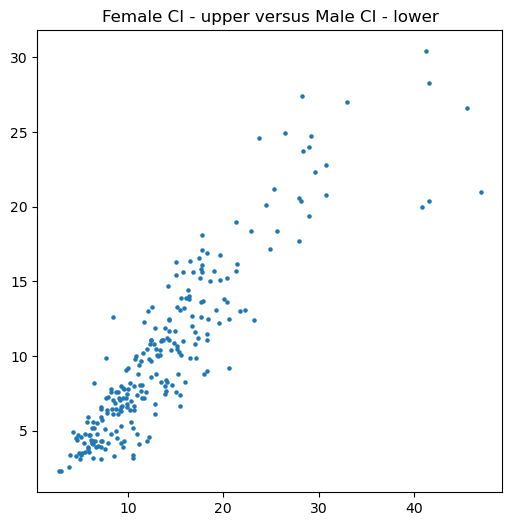

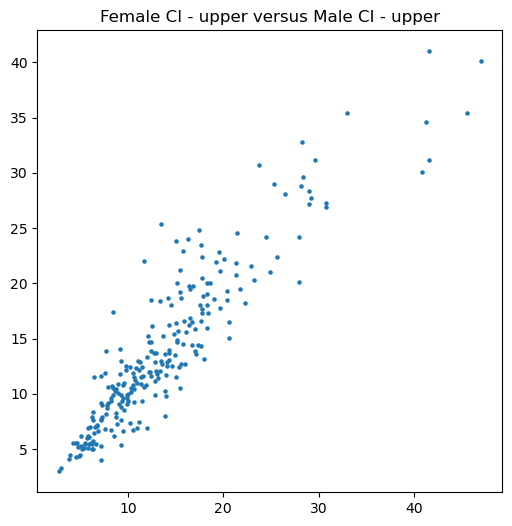

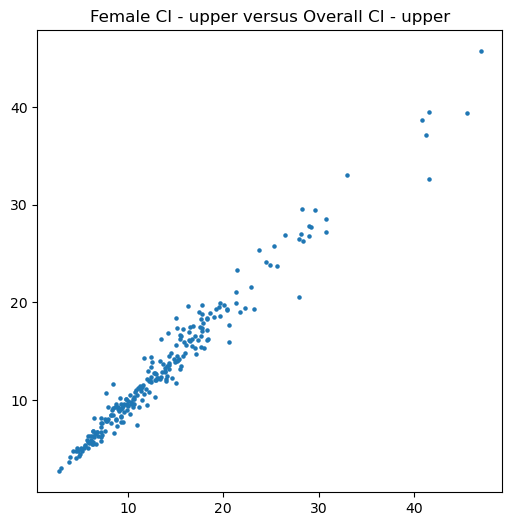

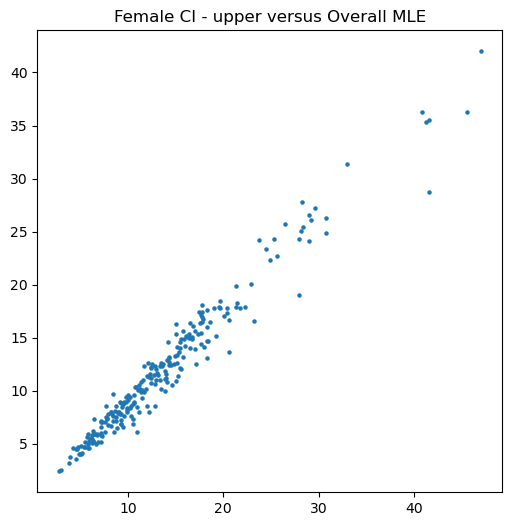

In [110]:
from matplotlib import pyplot as plt




for c1 in df_mle.columns:
    for c2 in df_mle.columns:
        if c1<c2:
            fig, ax = plt.subplots(figsize=(6, 6))
            ax.scatter(df_mle[c1],df_mle[c2],s=5)
            plt.title(c1+" versus "+c2)
            plt.show()

**Ejercicio 8** Nos ha entrado una duda con 'Female MLE' y  'Male MLE' ¿seguro que representan datos diferentes? Buscar un test adecuado y escribir código que muestre por pantalla un mensaje que despeje nuestra duda.


In [115]:
from scipy.stats import kstest

c1='Female MLE'
c2='Male MLE' 
v = kstest(df_mle[c1], df_mle[c2])
if v[1]<0.05:
    print(c1,c2," son poblaciones diferentes")
else:
    print(c1,c2, " no podemos asegurar que sean poblaciones diferentes")


Female MLE Male MLE  no podemos asegurar que sean poblaciones diferentes


**Ejercicio 9** Volvamos por un momento al comienzo, con `df_animales`:

In [116]:
df_animales

Species Common Name         Scientific Name TaxonClass  \
0                         Addax     Addax nasomaculatus   Mammalia   
1             Agouti, Brazilian     Dasyprocta leporina   Mammalia   
6               Antelope, Sable       Hippotragus niger   Mammalia   
7                Aracari, Green    Pteroglossus viridis       Aves   
8                  Argus, Great       Argusianus argusÊ       Aves   
..                          ...                     ...        ...   
325           Woodhoopoe, Green   Phoeniculus purpureus       Aves   
326     Wood-partridge, Crested        Rollulus rouloul       Aves   
327              Zebra, Grevy's            Equus grevyi   Mammalia   
328  Zebra, Hartmann's Mountain  Equus zebra hartmannae   Mammalia   
329               Zebra, Plains           Equus quagga    Mammalia   

     Overall Sample Size   Overall MLE  Overall CI - lower  \
0                  1215.0         13.4                12.4   
1                   456.0          8.1                 7.2   
6                  1398.0         11.3                10.5   
7                   358.0          7.9                 6.3   
8                   310.0         10.8                 9.4   
..                    ...          ...                 ...   
325                 284.0          5.4                 4.5   
326                1319.0          4.8                 4.6   
327                 797.0         14.1                12.9   
328                 585.0         13.9                12.3   
329                1635.0         15.6                14.4   

     Overall CI - upper  Male Sample Size  Male MLE  Male CI - lower  \
0                  14.5             558.0      12.3             10.5   
1                   9.3             216.0       8.8              6.9   
6                  11.9             602.0      10.6              9.8   
7                   9.3             174.0       8.5              6.1   
8                  12.5             138.0      10.6              8.3   
..                  ...               ...       ...              ...   
325                 6.3             136.0       6.0              4.7   
326                 5.1             645.0       5.0              4.6   
327                15.3             341.0      11.2              8.8   
328                15.3             283.0      12.3             10.8   
329                16.5             638.0      14.0             11.6   

     Male CI - upper  Female Sample Size   Female MLE  Female CI - lower  \
0               14.7                656.0        14.4               13.0   
1               10.3                220.0         7.8                6.8   
6               12.0                795.0        11.6               10.5   
7               10.9                175.0         7.6                6.2   
8               12.9                160.0        11.1                9.3   
..               ...                  ...         ...                ...   
325              7.0                130.0         4.3                3.2   
326              5.3                633.0         4.7                4.3   
327             13.2                455.0        16.5               14.4   
328             13.9                301.0        15.4               13.2   
329             15.9                991.0        16.0               14.9   

     Female CI - upper  
0                 15.1  
1                  8.6  
6                 12.2  
7                  8.9  
8                 14.1  
..                 ...  
325                6.0  
326                5.0  
327               18.0  
328               17.0  
329               17.0  

[246 rows x 15 columns]

Como vemos el nombre común (`Species Common Name`) se divide normalmente en dos partes separadas por coma, donde la primera es el nombre más usual (por ejemplo "Zebra") y el segundo el tipo más detallado (como "Hartmann's Mountain"). Queremos

1) Crear una columna `nombre` en `df_animales` con este nombre antes de la coma
2) Comprobar si está asociado/correlacionado con `TaxonClass` con un test $\mathcal{X}^2$ y escribiendo un mensaje adecuado

In [12]:
df_animales["nombre"] = df['Species Common Name'].str.split(',',expand=True).iloc[:,0]
from scipy.stats import chi2_contingency
contingencias=pd.crosstab(index=df_animales.nombre,columns=df.TaxonClass)
ChiSqResult = chi2_contingency(contingencias)
if ChiSqResult[1]<0.05:
    print("Hay asociación")
else: 
    print("no puedo descartar que no haya asociación")

Hay asociación


**Ejercicio 10** Es una pena que el test solo diga si hay asociación pero no la mida. Hay otro método, la *V de Cramer* que sí permite obtener un valor entre 0 y 1 reflejando el nivel de asociación.

$$
V = \sqrt{ \frac{\frac{\mathcal{X}^2}{n}}{ min(c-1, r-1)}}
$$

donde


    $\mathcal{X}^2$: El estadístico devuelto por `chi2_contingency` 
    $n$: Número de filas en el dataframe (que es el mismo para ambas columnas)
    $r$: Número de filas de la tabla de contingencias
    $c$: Número de columnas de la tabla de contingencias


[Aquí](https://www.statology.org/cramers-v-in-python/) hay una pequeña explicación de cómo se calcula



Escribir código para calcular el valor de V en nuestro caso

In [128]:
import scipy.stats as stats
import numpy as np
X2 = stats.chi2_contingency(contingencias, correction=False)[0]

N = np.sum(contingencias).sum()
minimum_dimension = min(contingencias.shape)-1
  
# Cramer V
result = np.sqrt((X2/N) / minimum_dimension)
print(result)

1.0
